In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc

Preliminary:

- Import Breast Cancer dataset and split it in a train set and a test set (20%). Fit a logistic regression on the dataset. _The goal is to focus on the metrics, that is why the code to fit the logistic Regression is given._

In [2]:
X , y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=43)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

1. Predict on the train set and test set

In [3]:
y_train_predicted = classifier.predict(X_train_scaled)
y_test_predicted = classifier.predict(X_test_scaled)

2. Compute F1, accuracy, precision, recall, roc_auc scores on the train set and test set. Print the confusion matrix on the test set results.

In [4]:
print(f"F1 for test set is: {f1_score(y_test, y_test_predicted)}")
print(f"F1 for train set is: {f1_score(y_train, y_train_predicted)}")

F1 for test set is: 0.9801324503311258
F1 for train set is: 0.9911504424778761


In [5]:
print(f"accuracy for test set is: {accuracy_score(y_test, y_test_predicted)}")
print(f"accuracy for train set is: {accuracy_score(y_train, y_train_predicted)}")

accuracy for test set is: 0.9736842105263158
accuracy for train set is: 0.989010989010989


In [6]:
print(f"precision for test set is: {precision_score(y_test, y_test_predicted)}")
print(f"precision for train set is: {precision_score(y_train, y_train_predicted)}")

precision for test set is: 0.9736842105263158
precision for train set is: 0.9893992932862191


In [7]:
print(f"recall for test set is: {recall_score(y_test, y_test_predicted)}")
print(f"recall for train set is: {recall_score(y_train, y_train_predicted)}")

recall for test set is: 0.9866666666666667
recall for train set is: 0.9929078014184397


In [8]:
print(f"roc_auc for test set is: {roc_auc_score(y_test, y_test_predicted)}")
print(f"roc_auc for train set is: {roc_auc_score(y_train, y_train_predicted)}")

roc_auc for test set is: 0.9676923076923077
roc_auc for train set is: 0.987783380478006


In [10]:
confusion_matrix(y_test, y_test_predicted)

array([[37,  2],
       [ 1, 74]])

**Note: AUC can only be computed on probabilities, not on classes.**

3. plot the AUC curve for the test set using `roc_curve` of scikit-learn. There are many ways to create this plot. It should look like this:

![logo_ex4](./w2_day4_ex4_q3.png)


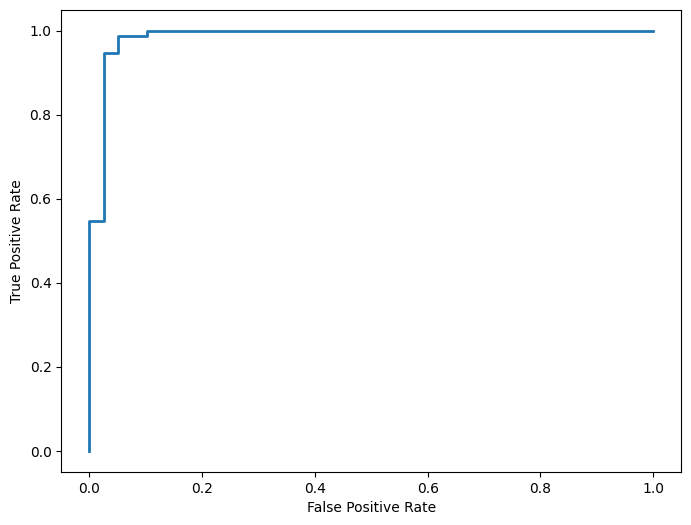

In [24]:
y_probs = classifier.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'pipline (AUC = {roc_auc:.2f})')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()